In [225]:
import ibis 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
ibis.options.interactive = True

## Connecting to PyPI BigQuery Dataset

In [72]:
pypiconn = ibis.bigquery.connect(
    project_id='marlenes-project',
    dataset_id='bigquery-public-data.pypi'
)

In [73]:
downloads = pypiconn.table('file_downloads', database='bigquery-public-data.pypi')

## Overall Download Stats For Ibis (Jan 2016- 7 Dec 2022)

In [226]:
current_time = datetime.now()

In [227]:
downloads = downloads[(downloads['timestamp'] >= '2016-01-01 00:47:45 UTC') & (downloads['timestamp'] <= current_time)]
ibis_downloads = downloads[(downloads.file.project == 'ibis-framework')]

In [228]:
ibis_downloads_ordered = ibis_downloads.group_by(ibis_downloads.timestamp.year()).aggregate(downloads = ibis_downloads.count()).sort_by(ibis.asc('year'))

In [229]:
ibis_downloads_ordered

,year,downloads
0,2016,15713
1,2017,16872
2,2018,17123
3,2019,33230
4,2020,549885
5,2021,4693310
6,2022,3605852


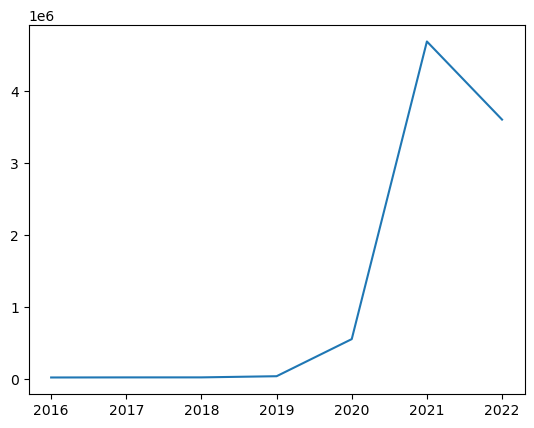

In [230]:
pd_ibis = ibis_downloads_ordered.execute()
plt.plot(pd_ibis.year, pd_ibis.downloads)

## Overall Github Stars for Ibis 

<img src="/Users/marlenemhangami/Desktop/visidata_ibis/star-history-2022126.png" alt="ibis_stars" width="550"/>

## Download Stats from 2022

In [234]:
downloads_2022 = downloads[(downloads['timestamp'] >= '2022-01-01 00:47:45 UTC')]
ibis_2022_downloads = downloads_2022[(downloads_2022.file.project == 'ibis-framework')]

In [235]:
ibis_2022_downloads_ordered = ibis_2022_downloads.group_by(ibis_2022_downloads.timestamp.month()).aggregate(downloads = ibis_2022_downloads.count()).sort_by(ibis.asc('month'))

In [236]:
ibis_2022_downloads_ordered

,month,downloads
0,1,148287
1,2,186870
2,3,222519
3,4,245844
4,5,246517
5,6,641629
6,7,471170
7,8,449874
8,9,244544
9,10,240535


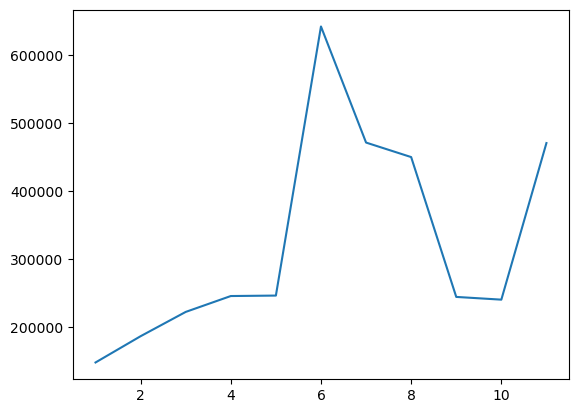

In [239]:
pd_ibis_2022 = ibis_2022_downloads_ordered[:11:].execute() #exclusing december since we are still early on
plt.plot(pd_ibis_2022.month, pd_ibis_2022.downloads)